In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

<Axes: xlabel='class', ylabel='count'>

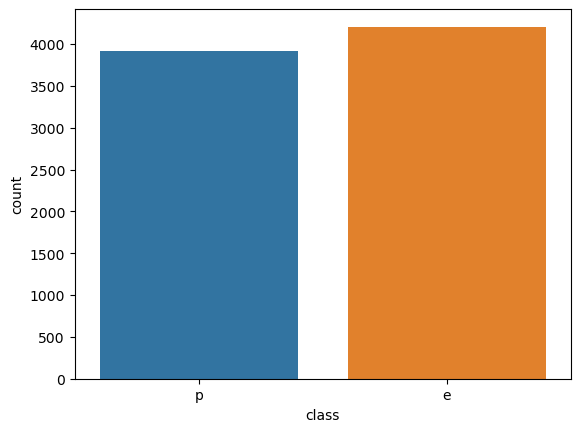

In [5]:
sns.countplot(data=df,x='class')

Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [6]:
df.describe().transpose().reset_index().sort_values('unique')

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


## Train Test Split

In [7]:
X = df.drop('class',axis=1)
y=df['class']

In [8]:
X = pd.get_dummies(X,drop_first=True)
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=101)

### Model

In [11]:
from sklearn.ensemble import AdaBoostClassifier

In [12]:
mod = AdaBoostClassifier(n_estimators=1)

In [13]:
mod.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

## Evaluation

In [14]:
from sklearn.metrics import classification_report, accuracy_score

In [15]:
y_pred = mod.predict(X_test)
y_pred

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [17]:
mod.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

<Axes: >

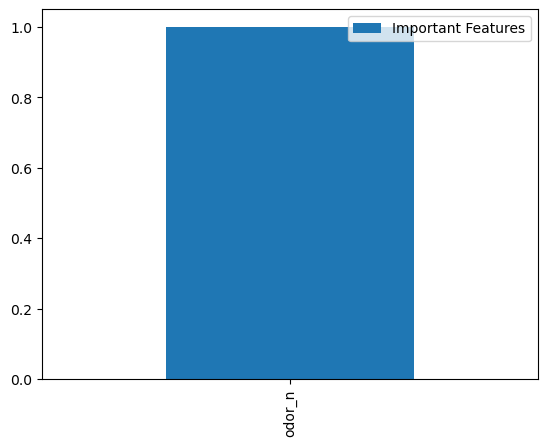

In [18]:
imp_feats = pd.DataFrame(index=X.columns,data=mod.feature_importances_,columns=['Important Features'])
imp_feats[imp_feats['Important Features']>0].sort_values('Important Features').plot(kind='bar')

In [19]:
mod.feature_importances_.argmax()

22

In [20]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

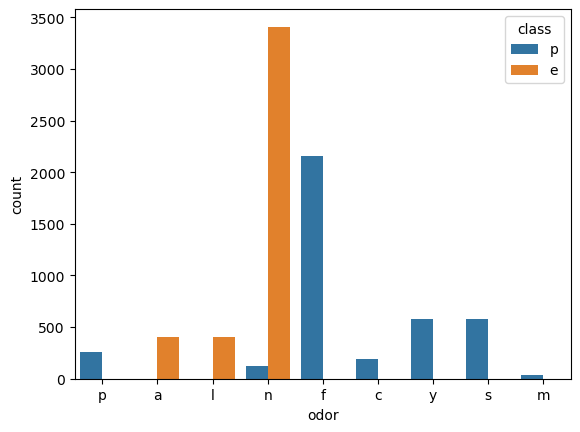

In [21]:
sns.countplot(data=df,x='odor',hue='class')

In [22]:
len(X.columns)

95

In [23]:
error_lst = []
for n in range(1,96):
    mod1 = AdaBoostClassifier(n_estimators=n)
    mod1.fit(X_train,y_train)
    pred = mod1.predict(X_test)
    err = 1-accuracy_score(y_test,pred)
    error_lst.append(err)

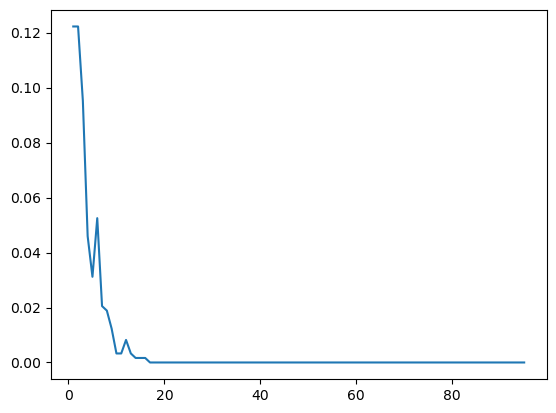

In [24]:
plt.plot(range(1,96),error_lst)

Repeat the process for ideal n_estimators (being equal to 18) and other number of estimators

### Gradient Boosting and Grid Search with CV

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
param_grid = {'n_estimators':[1,5,10,20,100],'max_depth':[3,4,5,6]}

In [27]:
gb = GradientBoostingClassifier()

In [28]:
from sklearn.model_selection import GridSearchCV

In [30]:
grid = GridSearchCV(gb,param_grid)
grid.fit(X_train,y_train)
y_pred = grid.predict(X_test)
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [31]:
y_pred

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [36]:
feature_imp = grid.best_estimator_.feature_importances_
imp_feat = pd.DataFrame(index=X.columns, data=feature_imp, columns = ['Importance'])
imp_feat

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,2.595596e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,6.607717e-17
...,...
habitat_l,0.000000e+00
habitat_m,4.387844e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [42]:
imp_feat = imp_feat[imp_feat['Importance']>0.005]
imp_feat = imp_feat.sort_values('Importance',ascending=False)
imp_feat

,Importance
odor_n,0.614744
stalk-root_c,0.136125
bruises_t,0.051926
stalk-root_r,0.041734
spore-print-color_r,0.030495
stalk-surface-below-ring_y,0.024425
odor_l,0.018250
odor_f,0.013898
gill-spacing_w,0.012509
gill-size_n,0.011074


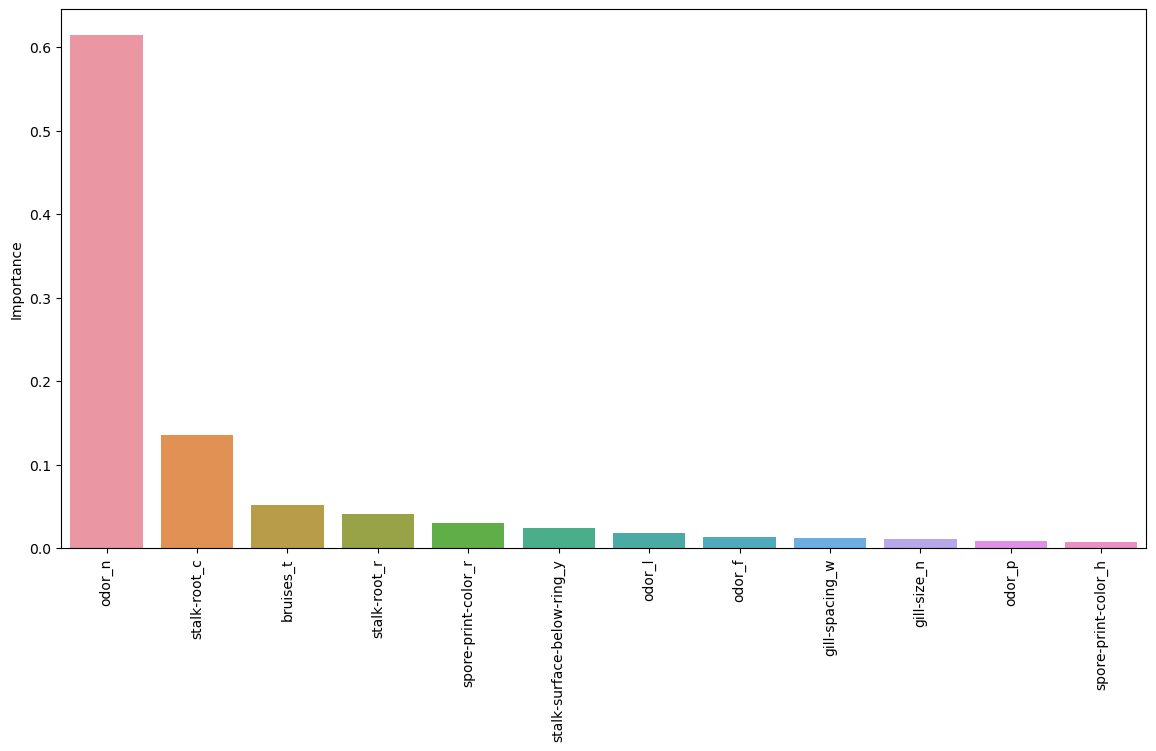

In [46]:
plt.figure(figsize=(14,7))
sns.barplot(data=imp_feat,x=imp_feat.index, y='Importance')
plt.xticks(rotation=90);